Map locations offering favorite dish

In [1]:
import os

os.chdir('C:/Users/esram/OneDrive/Desktop/esrabecode/delivery-market-analysis')

os.getcwd()

'C:\\Users\\esram\\OneDrive\\Desktop\\esrabecode\\delivery-market-analysis'

In [2]:
import sqlite3
import pandas as pd
import folium
from folium.plugins import MarkerCluster

conn = sqlite3.connect('data/takeaway.db')

query = """
SELECT r.primarySlug,
       r.name,
       r.city, 
       r.latitude, 
       r.longitude,
       AVG(m.price) as avg_price, 
       GROUP_CONCAT(m.name, ', ') AS kebap_items
FROM restaurants r
JOIN menuItems m
    ON r.primarySlug = m.primarySlug
WHERE m.name LIKE '%kebap%'
GROUP BY r.primarySlug, r.name, r.city, r.latitude, r.longitude
"""
df_restaurants = pd.read_sql_query(query, conn)
df_restaurants

,primarySlug,name,city,latitude,longitude,avg_price,kebap_items
0,a-la-turka-berchem,A La Turka Berchem,Antwerpen,51.196704,4.422420,7.666667,"Schotel kebap, Schotel mix kebap shoarma, Scho..."
1,abu-simbel-1,Eethuis Turnhout,Turnhout,51.319332,4.949775,10.000000,"Schotel kebap, Dürüm bicky kebap, Broodje döne..."
2,ada-grill-burger,Ada Grill & Burger,Maastricht,50.846569,5.694118,11.500000,"Voordeelmenu kapsalon döner kebap, Friet met k..."
3,adak-kebab-1,Adak Kebab,Hamont-Achel,51.250926,5.542149,12.500000,"Pizza kebap, Calzone kebap"
4,adana-kebab-mechelen,Adana Kebab,Mechelen,51.029067,4.488367,13.000000,Bidos dürüm kebap
...,...,...,...,...,...,...,...
232,ustun,Ümit Pizza Kebab Grillroom,Houthalen-Helchteren,51.030933,5.371585,7.500000,Döner box kebap
233,venus-3520,Venus,Zonhoven,50.999555,5.332017,14.727273,"Menu broodje kebap, Pizza kebap, Calzone kebap..."
234,venus-7,Venus 7,Beverlo,51.087404,5.219672,9.000000,"Kebap dürüm, Kebap box with fries"
235,venus-8,Venus 8,Beringen,51.055254,5.273891,9.000000,"Kebap dürüm, Kebap box with fries"


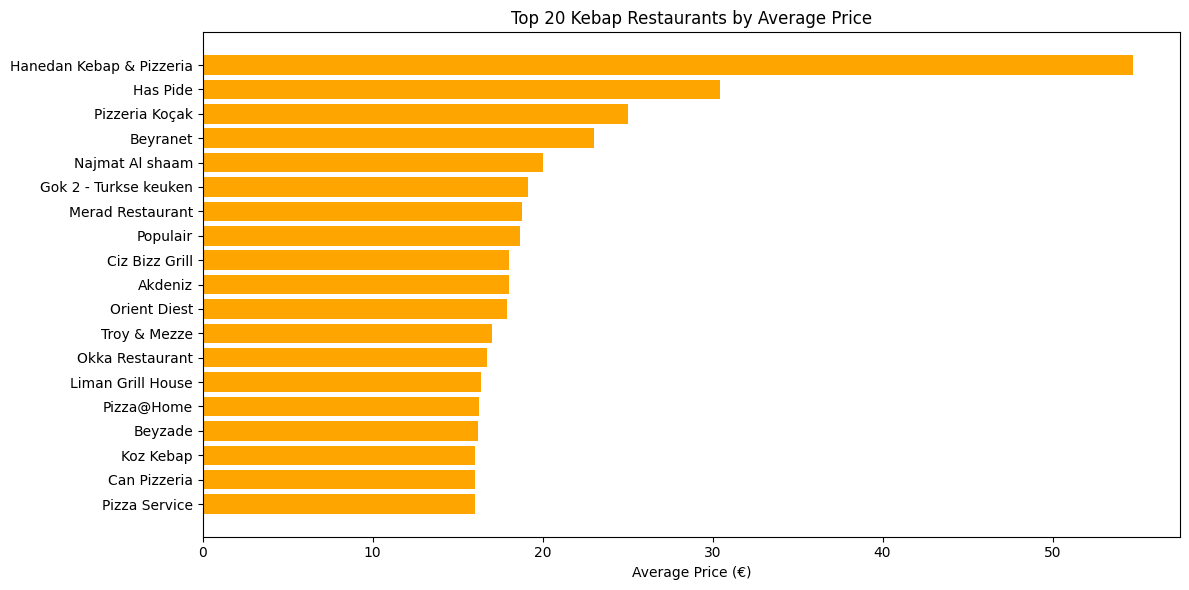

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))


top20_kebap = df_restaurants.sort_values("avg_price", ascending=False).head(20)

plt.barh(top20_kebap['name'], top20_kebap['avg_price'], color='orange')
plt.xlabel('Average Price (€)')
plt.title('Top 20 Kebap Restaurants by Average Price')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


In [4]:
import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[50.85, 4.35], zoom_start=8)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in df_restaurants.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['name']}<br>Avg Price: €{row['avg_price']:.2f}"
    ).add_to(marker_cluster)

m.save("kebap_map.html")

